Datos Rayos X

Librerias

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Carga Datos

In [6]:
actividad1=pd.read_csv("Actividad 1.csv",sep=',',encoding='utf-8').drop([0,1])
actividad1=actividad1.apply(pd.to_numeric)
actividad2ambiente=pd.read_csv('Actividad 2 ambiente.csv',sep=',',encoding='utf-8').drop(0)
actividad2ambiente=actividad2ambiente.apply(pd.to_numeric)
actividad2Al0_02=pd.read_csv('Actividad 2 Al 0.02mm.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_02=actividad2Al0_02.apply(pd.to_numeric)
actividad2Al0_04=pd.read_csv('Actividad 2 Al 0.04.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_04=actividad2Al0_04.apply(pd.to_numeric)
actividad2Al0_06=pd.read_csv('Actividad 2 Al 0.06.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_06=actividad2Al0_06.apply(pd.to_numeric)
actividad2Al0_08=pd.read_csv('Actividad 2 Al 0.08.csv',sep=',',encoding='utf-8').drop(0)
actividad2Al0_08=actividad2Al0_08.apply(pd.to_numeric)
actividad2Zn0_025=pd.read_csv('Actividad 2 Zn 0.025.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_025=actividad2Zn0_025.apply(pd.to_numeric)
actividad2Zn0_05=pd.read_csv('Actividad 2 Zn 0.05.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_05=actividad2Zn0_05.apply(pd.to_numeric)
actividad2Zn0_075=pd.read_csv('Actividad 2 Zn 0.075.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_075=actividad2Zn0_075.apply(pd.to_numeric)
actividad2Zn0_1=pd.read_csv('Actividad 2 Zn 0.1.csv',sep=',',encoding='utf-8').drop(0)
actividad2Zn0_1=actividad2Zn0_1.apply(pd.to_numeric)
actividad2Al0_02.dtypes

FileNotFoundError: [Errno 2] No such file or directory: 'Actividad 1.csv'

Actividad 1

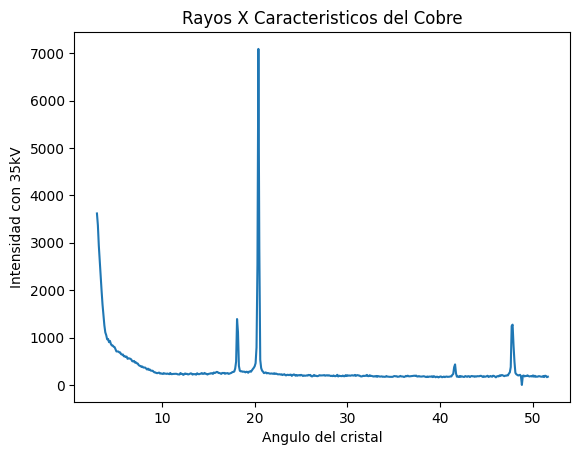

In [61]:
plt.plot(actividad1["Ángulo del crista"],actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Angulo del cristal')
plt.ylabel('Intensidad con 35kV')
plt.show()

2.8

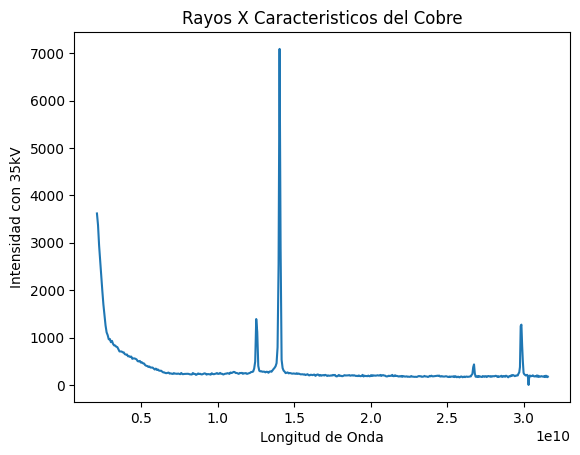

In [66]:
def ley_de_bragg(theta):
    d=2.014*10**10 #GUIA
    n=1 #ARBITRARIO
    lambda1=(2*d*np.sin(np.deg2rad(theta)))/n
    return lambda1
longitudes_de_onda=ley_de_bragg(actividad1['Ángulo del crista'])
plt.plot(longitudes_de_onda,actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.show()

14000000000.0
Gamma ajustado: 1e-11


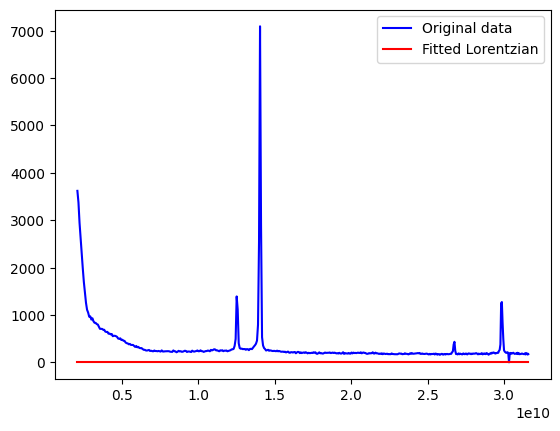

In [96]:
#Lorentziana
def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2))


picoKa=np.max(actividad1['Tasa con 35kV'])
x0 =1.4*10**10
print(x0)
def fit_lorentzian(x, gamma):
    return lorentzian(x, picoKa, x0, gamma)

# Ajuste con curve_fit
initial_guess = [0.00000000001]  # Valor inicial para gamma
params, covariance = curve_fit(fit_lorentzian, longitudes_de_onda, actividad1['Tasa con 35kV'], p0=initial_guess)

# Extraer el valor de gamma ajustado
gamma_fit = params[0]
print(f"Gamma ajustado: {gamma_fit}")


"""
initial_guess = [picoKa, x0, 8]
datos_intensidadKa=lorentzian(longitudes_de_onda,1,0,1)
params , covarianza = curve_fit(lorentzian, longitudes_de_onda, actividad1['Tasa con 35kV'],p0=initial_guess)
A_fit, x0_fit, gamma_fit = params
"""



fit=fit_lorentzian(longitudes_de_onda,gamma_fit)
plt.plot(longitudes_de_onda, actividad1['Tasa con 35kV'], 'b', label='Original data')
plt.plot(longitudes_de_onda, fit, 'r-', label='Fitted Lorentzian')
plt.legend()
plt.show()


1.9

ACTIVIDAD 2


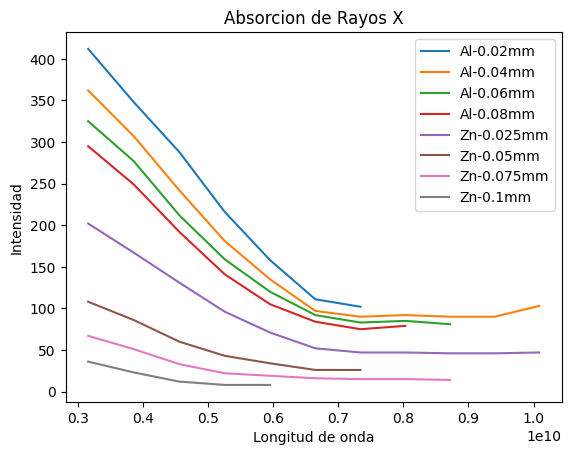

In [104]:
plt.plot(ley_de_bragg(actividad2Al0_02['Ángulo del crista']),actividad2Al0_02['Tasa con 30kV'],label='Al-0.02mm')
plt.plot(ley_de_bragg(actividad2Al0_04['Ángulo del crista']),actividad2Al0_04['Tasa con 30kV'],label='Al-0.04mm')
plt.plot(ley_de_bragg(actividad2Al0_06['Ángulo del crista']),actividad2Al0_06['Tasa con 30kV'],label='Al-0.06mm')
plt.plot(ley_de_bragg(actividad2Al0_08['Ángulo del crista']),actividad2Al0_08['Tasa con 30kV'],label='Al-0.08mm')
plt.plot(ley_de_bragg(actividad2Zn0_025['Ángulo del crista']),actividad2Zn0_025['Tasa con 30kV'],label='Zn-0.025mm')
plt.plot(ley_de_bragg(actividad2Zn0_05['Ángulo del crista']),actividad2Zn0_05['Tasa con 30kV'],label='Zn-0.05mm')
plt.plot(ley_de_bragg(actividad2Zn0_075['Ángulo del crista']),actividad2Zn0_075['Tasa con 30kV'],label='Zn-0.075mm')
plt.plot(ley_de_bragg(actividad2Zn0_1['Ángulo del crista']),actividad2Zn0_1['Tasa con 30kV'],label='Zn-0.1mm')
plt.legend()
plt.title('Absorcion de Rayos X')
plt.xlabel('Longitud de onda')
plt.ylabel('Intensidad')
plt.show()